In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Kang/Desktop/金融科技Final Project/領先指標csv/未命名檔案夾/三大法人.csv', encoding = 'big5hkscs', index_col = 'Date')
df = df.set_index(pd.to_datetime(df.index))

In [3]:
df_simplify = pd.DataFrame(index = df.index, columns = ['合計', '外資', '投信', '自營商'])

In [4]:
df_simplify['合計'] = df['合計']
df_simplify['外資'] = df[['外資', '外資及陸資', '外資及陸資(不含外資自營商)']].sum(axis=1)
#外資自營商算在自營裡面
df_simplify['投信'] = df['投信']
df_simplify['自營商'] = df[['自營商', '自營商(自行買賣)', '自營商(避險)']].sum(axis=1)

# 日資料畫圖

In [5]:
from matplotlib.font_manager import FontProperties
font_noto_12 = FontProperties(fname = '/Library/Fonts/NotoSansCJKtc-Regular.otf', size = 12)
font_noto_18 = FontProperties(fname = '/Library/Fonts/NotoSansCJKtc-Regular.otf', size = 18)
from IPython.core.pylabtools import figsize
figsize(12, 8)

In [6]:
from matplotlib.ticker import FuncFormatter
#用來為y軸加上單位縮寫的函式
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["B", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    #print (val, signf)
                    if str(val).split(".")[1] == "0":
                        return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

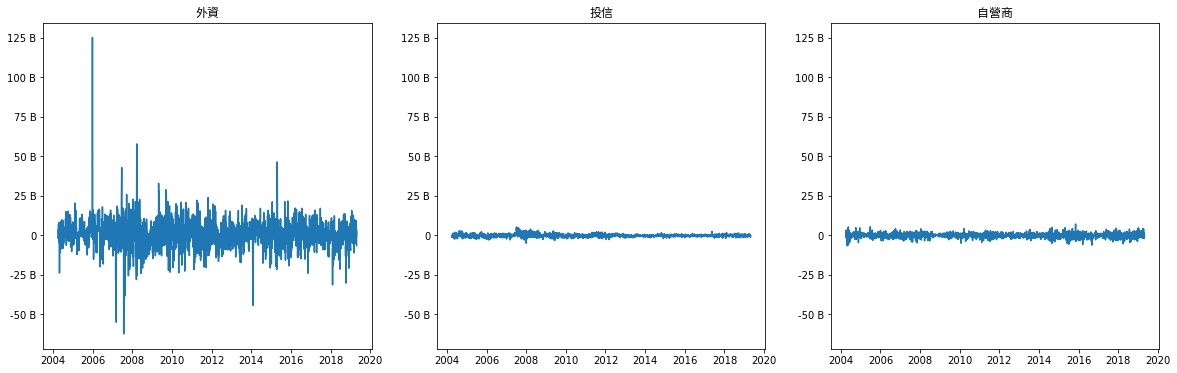

In [7]:
f = plt.figure(figsize=(20,6))

ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132, sharey = ax1)
ax3 = f.add_subplot(133, sharey = ax1)

ax1.plot(df_simplify[df_simplify.columns[1]])
ax2.plot(df_simplify[df_simplify.columns[2]])
ax3.plot(df_simplify[df_simplify.columns[3]])

ax1.set_title(df_simplify.columns[1], fontproperties = font_noto_12)
ax2.set_title(df_simplify.columns[2], fontproperties = font_noto_12)
ax3.set_title(df_simplify.columns[3], fontproperties = font_noto_12)

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax3.yaxis.set_major_formatter(FuncFormatter(y_fmt))

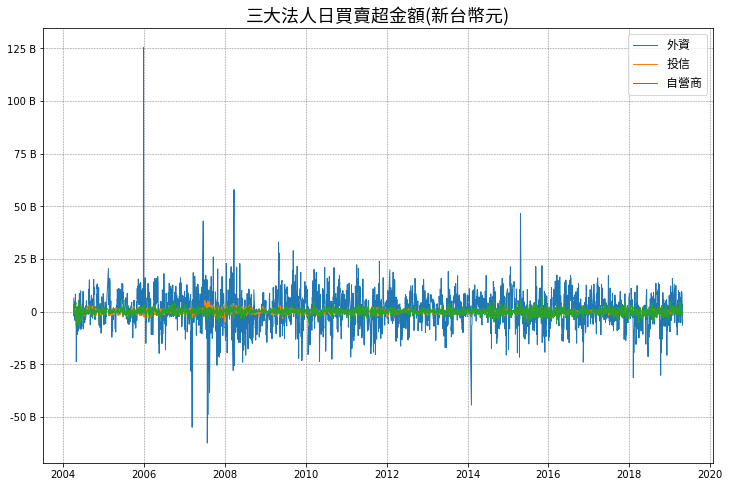

In [8]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

#plt.plot(df_simplify[df_simplify.columns[1:]].loc[df_simplify.index.year>=2016], linewidth=1)
plt.plot(df_simplify[df_simplify.columns[1:]], linewidth=1)
plt.title('三大法人日買賣超金額(新台幣元)', fontproperties = font_noto_18)
plt.legend(df_simplify.columns[1:], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

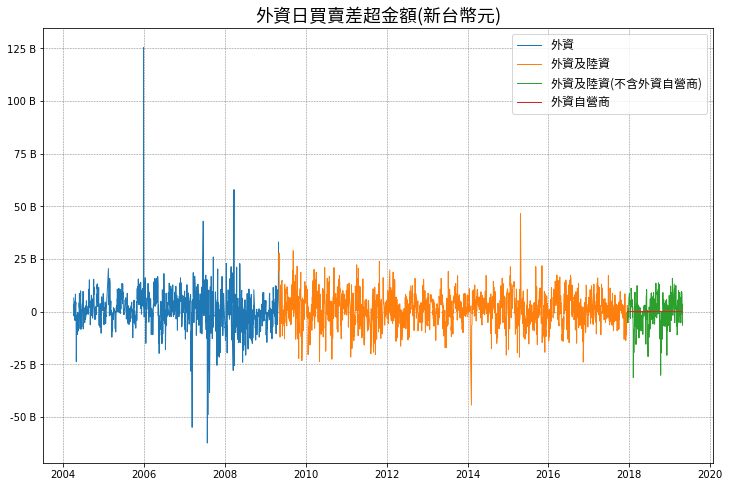

In [9]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(df[df.columns[1:5]], linewidth=1)
plt.title('外資日買賣差超金額(新台幣元)', fontproperties = font_noto_18)
plt.legend(df.columns[1:5], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

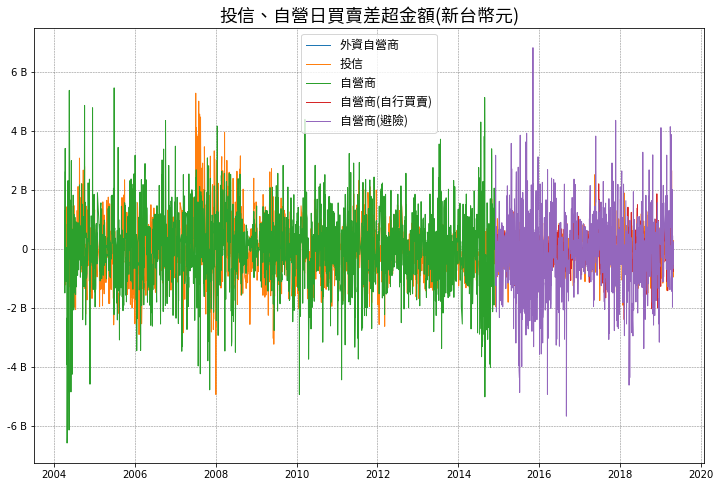

In [10]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(df[df.columns[4:]], linewidth=1)
plt.title('投信、自營日買賣差超金額(新台幣元)', fontproperties = font_noto_18)
plt.legend(df.columns[4:], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 月均

In [11]:
df_simplify_m = df_simplify.resample('M').mean()
df_m = df.resample('M').mean()

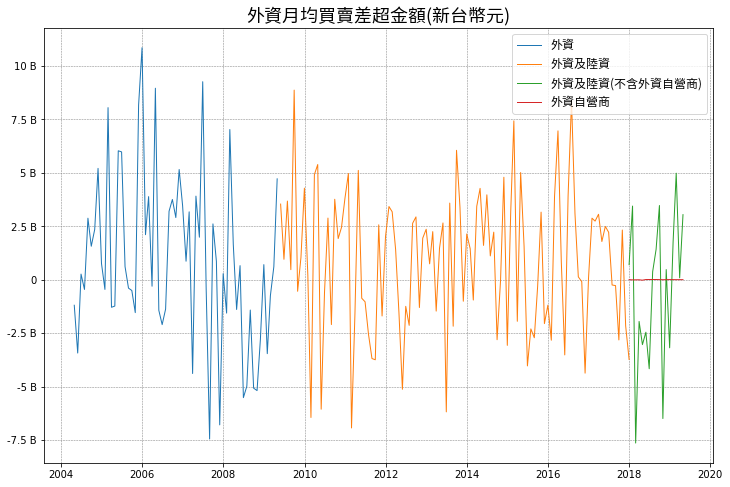

In [12]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(df_m[df.columns[1:5]], linewidth=1)
plt.title('外資月均買賣差超金額(新台幣元)', fontproperties = font_noto_18)
plt.legend(df.columns[1:5], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

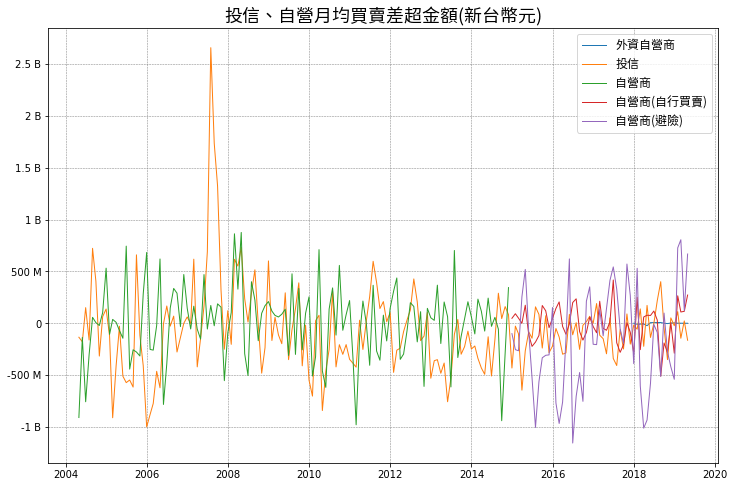

In [13]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(df_m[df.columns[4:]], linewidth=1)
plt.title('投信、自營月均買賣差超金額(新台幣元)', fontproperties = font_noto_18)
plt.legend(df.columns[4:], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

In [14]:
#df_simplify_m.to_csv('/Users/Kang/Desktop/three_entity_brief.csv', encoding = 'big5hkscs')
#df_m.to_csv('/Users/Kang/Desktop/three_entity.csv', encoding = 'big5hkscs')

# Merge 定期定額資料

In [15]:
df_periodic_invest = pd.read_csv('/Users/Kang/Desktop/periodic_invest.csv', index_col = 0)
df_periodic_invest = df_periodic_invest.set_index(pd.to_datetime(df_periodic_invest.index))

In [16]:
df_simplify_m_merge = pd.merge(df_periodic_invest, df_simplify_m, right_index=True, left_index=True)
df_m_merge = pd.merge(df_periodic_invest, df_m, right_index=True, left_index=True)

In [17]:
df_simplify_m_merge

,Units,People,NT dollars,合計,外資,投信,自營商
2016-04-30,646740,494755,3339348556,2.792149e+08,8.292596e+08,-2.861947e+08,-2.638500e+08
2016-05-31,647841,491540,3320066240,-2.821003e+09,-3.520436e+09,8.585779e+07,6.135749e+08
2016-06-30,626222,482408,3220463290,2.844557e+09,3.911183e+09,-1.112158e+08,-9.554102e+08
2016-07-31,620540,478237,3204103712,7.919727e+09,8.384260e+09,5.621168e+06,-4.701544e+08
2016-08-31,629334,479580,3270332585,2.280605e+09,3.088445e+09,-2.520291e+08,-5.558108e+08
2016-09-30,621588,476494,3227641830,-8.042763e+08,1.307623e+08,-1.921448e+07,-9.158241e+08
2016-10-31,619047,473936,3180583198,4.572380e+07,-9.295528e+07,1.527991e+07,1.233992e+08
2016-11-30,615909,470553,3205094427,-3.895270e+09,-4.372521e+09,6.699410e+07,4.102571e+08
2016-12-31,606144,466241,3149472672,-1.453592e+08,8.831551e+07,4.673045e+03,-2.336794e+08
2017-01-31,472237,385447,2420542262,2.766499e+09,2.874971e+09,1.899699e+08,-2.984416e+08


In [18]:
df_m_merge

,Units,People,NT dollars,合計,外資,外資及陸資,外資及陸資(不含外資自營商),外資自營商,投信,自營商,自營商(自行買賣),自營商(避險)
2016-04-30,646740,494755,3339348556,2.792149e+08,NaN,8.292596e+08,NaN,NaN,-2.861947e+08,NaN,-1.060065e+08,-1.578435e+08
2016-05-31,647841,491540,3320066240,-2.821003e+09,NaN,-3.520436e+09,NaN,NaN,8.585779e+07,NaN,-6.858247e+06,6.204332e+08
2016-06-30,626222,482408,3220463290,2.844557e+09,NaN,3.911183e+09,NaN,NaN,-1.112158e+08,NaN,1.998584e+08,-1.155269e+09
2016-07-31,620540,478237,3204103712,7.919727e+09,NaN,8.384260e+09,NaN,NaN,5.621168e+06,NaN,2.355246e+08,-7.056790e+08
2016-08-31,629334,479580,3270332585,2.280605e+09,NaN,3.088445e+09,NaN,NaN,-2.520291e+08,NaN,-8.068894e+07,-4.751219e+08
2016-09-30,621588,476494,3227641830,-8.042763e+08,NaN,1.307623e+08,NaN,NaN,-1.921448e+07,NaN,-1.625318e+08,-7.532924e+08
2016-10-31,619047,473936,3180583198,4.572380e+07,NaN,-9.295528e+07,NaN,NaN,1.527991e+07,NaN,-8.929506e+07,2.126942e+08
2016-11-30,615909,470553,3205094427,-3.895270e+09,NaN,-4.372521e+09,NaN,NaN,6.699410e+07,NaN,5.917833e+07,3.510788e+08
2016-12-31,606144,466241,3149472672,-1.453592e+08,NaN,8.831551e+07,NaN,NaN,4.673045e+03,NaN,-3.110079e+07,-2.025786e+08
2017-01-31,472237,385447,2420542262,2.766499e+09,NaN,2.874971e+09,NaN,NaN,1.899699e+08,NaN,-9.224119e+07,-2.062004e+08


In [19]:
#df_simplify_m_merge.to_csv('/Users/Kang/Desktop/merge_data_2.csv', encoding = 'big5hkscs')
#df_m_merge.to_csv('/Users/Kang/Desktop/merge_data_2_1.csv', encoding = 'big5hkscs')